Importing Libries Need

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 01 : Data Cleaning Preparation

In [197]:
df = pd.read_csv(r'/content/googleplaystore.csv')

df.fillna(0, inplace = True)
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',', '').str.rstrip('+'), errors = 'coerce')
df['Size'] = pd.to_numeric(df['Size'].str.rstrip('M'), errors = 'coerce')

df['Price'] = pd.to_numeric(df['Price'].str.rstrip('$'), errors = 'coerce')

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Type'] = df['Type'].map({'Free': 0, 'Paid': 1}).astype(bool)

df.dropna(inplace = True)


# 02 : Exploratory Data Analysis

In [198]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7958,"Resume Builder Free, CV Maker & Resume Templates",BUSINESS,4.4,20921.0,5.7,1000000.0,False,0.0,Everyone,Business,2018-01-11,4.0.3,4.1 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14.0,1000.0,False,0.0,Everyone,Communication,2014-11-21,2.2.1.5,2.2 and up
1539,Benefits of olive oil with garlic,LIBRARIES_AND_DEMO,0.0,25.0,2.5,10000.0,False,0.0,Everyone,Libraries & Demo,2018-06-23,1.0,4.0.3 and up
7749,Snowboard Racing Free Fun Game,GAME,3.8,4552.0,43.0,100000.0,False,0.0,Everyone,Racing,2016-10-26,1.4.0,2.3.3 and up
5895,Az Video Status,FAMILY,4.8,13.0,6.0,100.0,False,0.0,Everyone,Entertainment,2018-08-02,1.0.4,4.1 and up
7563,"m, cm, mm to yard, feet, inch converter tool",TOOLS,4.3,246.0,2.8,100000.0,False,0.0,Everyone,Tools,2018-02-06,1.1,4.0 and up
7806,CR Magazine,BUSINESS,1.0,1.0,7.8,100.0,False,0.0,Everyone,Business,2014-07-23,2.4.2,2.3.3 and up
8387,DG Cars,TRAVEL_AND_LOCAL,2.6,122.0,11.0,10000.0,False,0.0,Everyone,Travel & Local,2018-06-08,31.11.9.156,4.1 and up
10437,Real Airplane Flight Simulator: Pilot Games,FAMILY,3.3,21735.0,37.0,1000000.0,False,0.0,Everyone,Simulation,2018-07-11,1.0.03,4.0 and up
9810,ES Billing System (Offline App),PRODUCTIVITY,5.0,1.0,4.2,100.0,False,0.0,Everyone,Productivity,2018-05-17,1.0,4.1 and up


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8175 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8175 non-null   object        
 1   Category        8175 non-null   object        
 2   Rating          8175 non-null   float64       
 3   Reviews         8175 non-null   float64       
 4   Size            8175 non-null   float64       
 5   Installs        8175 non-null   float64       
 6   Type            8175 non-null   bool          
 7   Price           8175 non-null   float64       
 8   Content Rating  8175 non-null   object        
 9   Genres          8175 non-null   object        
 10  Last Updated    8175 non-null   datetime64[ns]
 11  Current Ver     8175 non-null   object        
 12  Android Ver     8175 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(5), object(6)
memory usage: 838.3+ KB


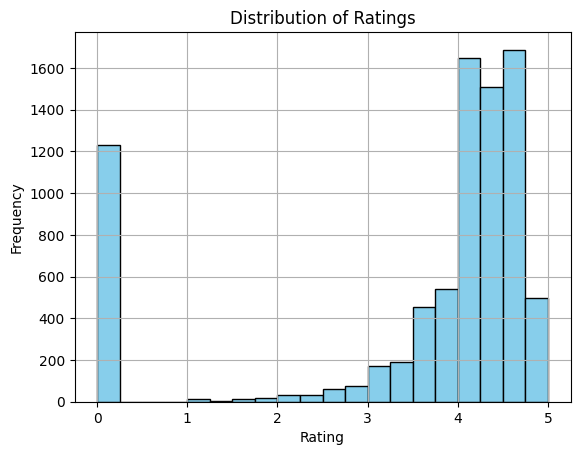

In [200]:
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

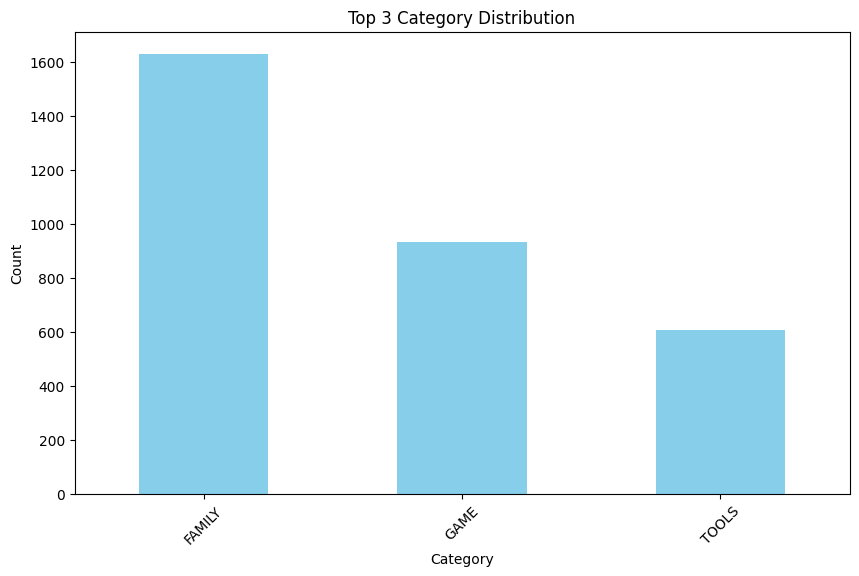

In [201]:
top_categories = df['Category'].value_counts().nlargest(3)
top_categories.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 3 Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 03 : Category Analysis

In [202]:
# 1. Average Rating by Category
average_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
top_3_categories = average_rating_by_category.nlargest(5)
print("Top 3 Categories with the Highest Average Rating:\n", top_3_categories)

# 2. Most Reviews
most_reviews_category = df.groupby('Category')['Reviews'].sum().nlargest(5).index.tolist()
print("Category with the Most Reviews:", most_reviews_category)

# 3. Most Apps
most_apps_category = df['Category'].value_counts().nlargest(5).index.tolist()
print("Category with the Most Apps:", most_apps_category)


Top 3 Categories with the Highest Average Rating:
 Category
EDUCATION         4.336190
ENTERTAINMENT     4.141573
ART_AND_DESIGN    4.120339
GAME              4.093676
COMICS            3.967347
Name: Rating, dtype: float64
Category with the Most Reviews: ['GAME', 'FAMILY', 'COMMUNICATION', 'TOOLS', 'PHOTOGRAPHY']
Category with the Most Apps: ['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL']


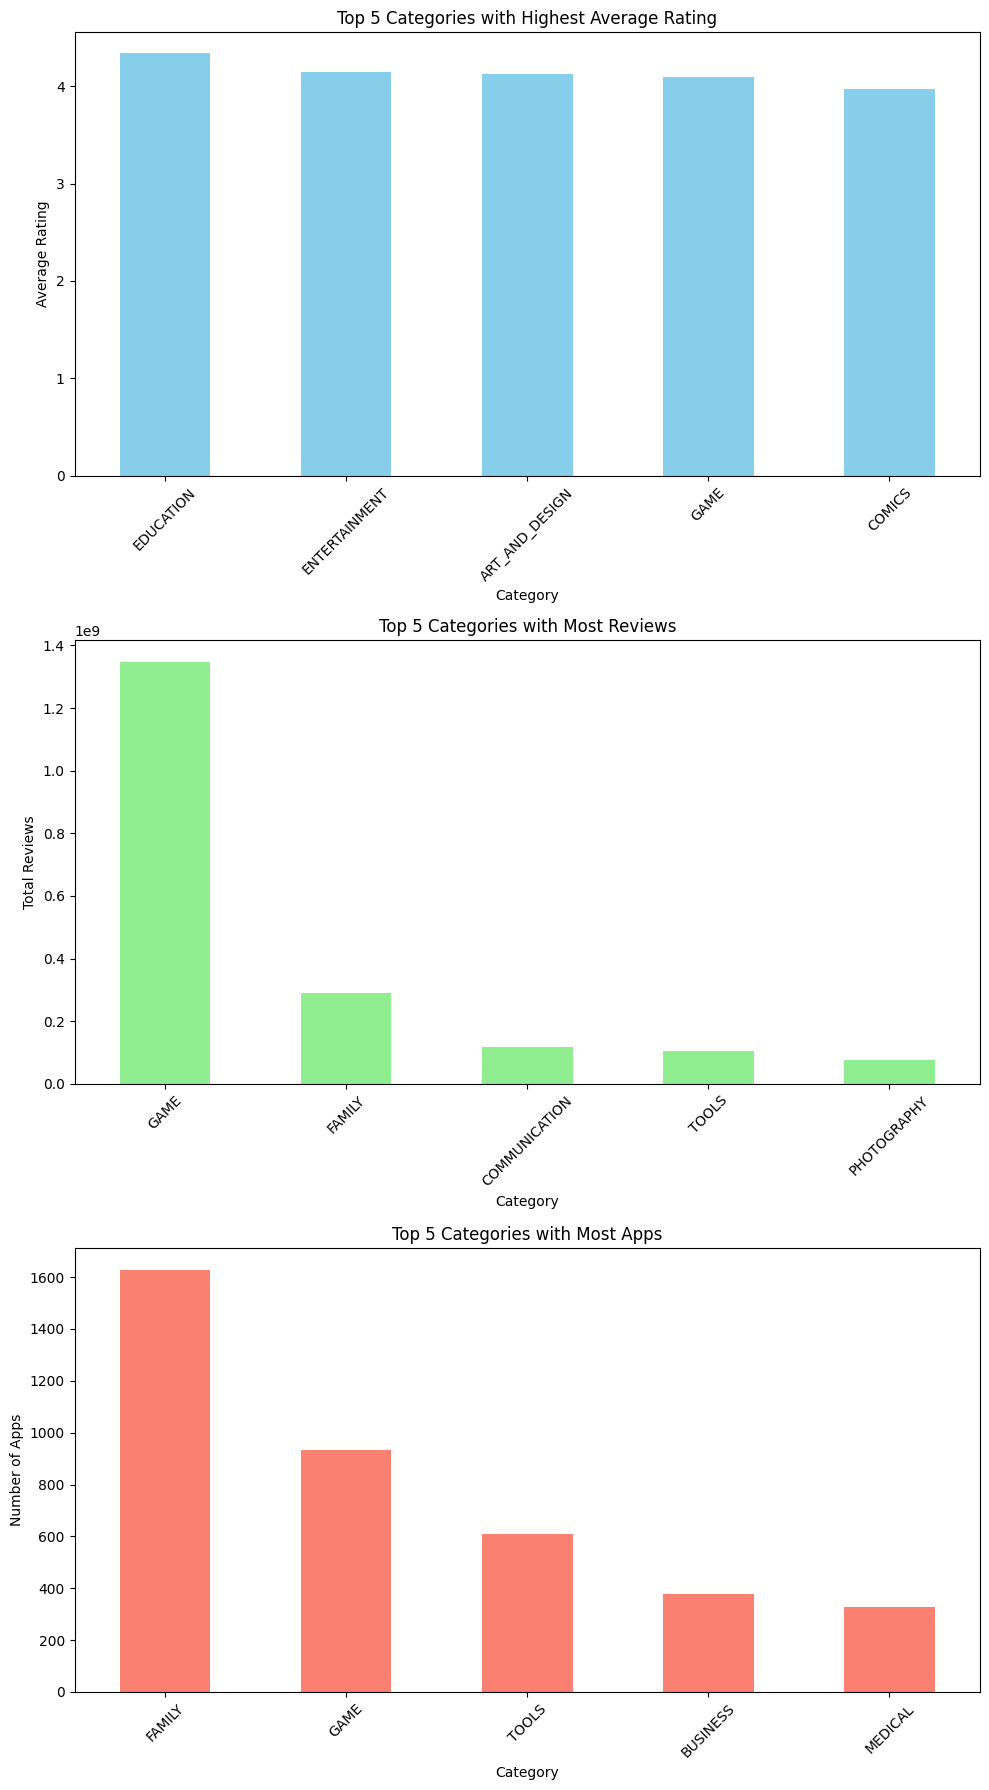

In [203]:
# Top 5 categories based on average rating
average_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).nlargest(5)

# Top 5 categories based on most reviews
most_reviews_category = df.groupby('Category')['Reviews'].sum().nlargest(5)

# Top 5 categories based on most apps
most_apps_category = df['Category'].value_counts().nlargest(5)

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for average rating
average_rating_by_category.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 Categories with Highest Average Rating')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average Rating')
axes[0].tick_params(axis='x', rotation=45)

# Plot for most reviews
most_reviews_category.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 5 Categories with Most Reviews')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Reviews')
axes[1].tick_params(axis='x', rotation=45)

# Plot for most apps
most_apps_category.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Top 5 Categories with Most Apps')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Number of Apps')
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()

# Show plot
plt.show()

# 04 : Rating Prediction Model

In [204]:
X = df[['Reviews', 'Size', 'Installs', 'Type', 'Price']]
y = df['Rating']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.4326280456441323
R-squared: 0.027569201102012886


# 05 : Trend Analysis

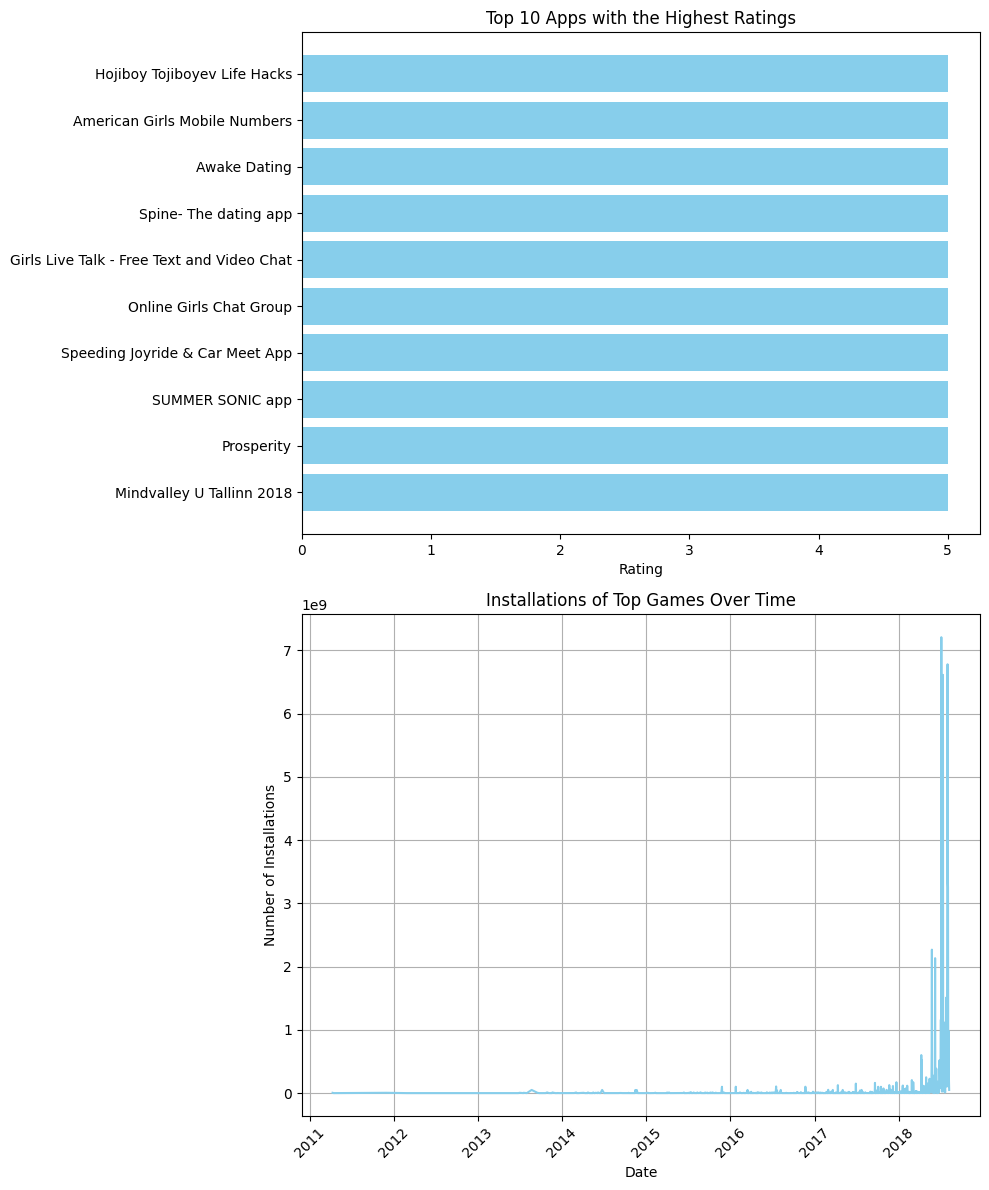

In [207]:
# Data for visualization
top_rated_apps = df.nlargest(10, 'Rating')
installations_by_date = df.groupby('Last Updated')['Installs'].sum()

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot top 10 apps with the highest ratings
axs[0].barh(top_rated_apps['App'], top_rated_apps['Rating'], color='skyblue')
axs[0].set_xlabel('Rating')
axs[0].set_title('Top 10 Apps with the Highest Ratings')
axs[0].invert_yaxis()

# Plot time series of installations
axs[1].plot(installations_by_date.index, installations_by_date.values, color='skyblue')
axs[1].set_title('Installations of Top Games Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Installations')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# 06 : Impact of Reviews on Ratings


Correlation between Reviews and Rating: 0.088100686899167


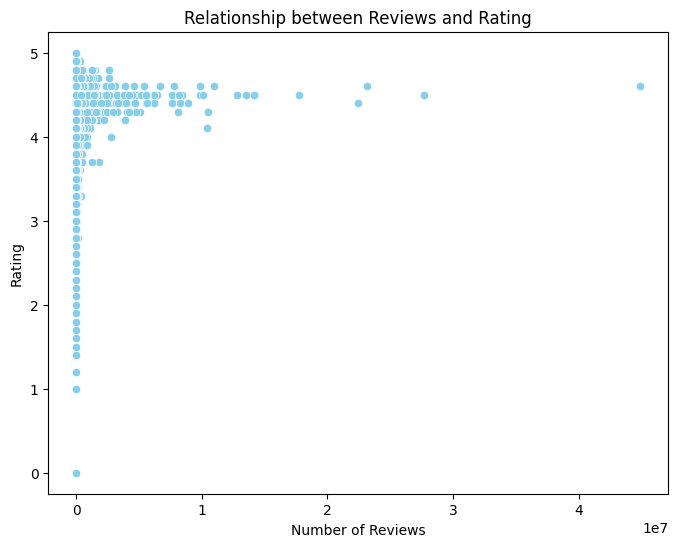

In [209]:
correlation = df['Reviews'].corr(df['Rating'])
print("Correlation between Reviews and Rating:", correlation)

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, color='skyblue')
plt.title('Relationship between Reviews and Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()